"""
案例:
    演示近30天, 天气分布情况.

结论:
    针对于 β(调节权重系数)来讲, 其值越大说明: 越依赖指数加权平均, 越不依赖本地的梯度值, 数据就越: 平缓.
"""

In [1]:

import torch
import matplotlib.pyplot as plt

ELEMENT_NUMBER = 30

# 1. 实际平均温度

tensor([-11.2584, -11.5236,  -2.5058,  -4.3388,   8.4871,   6.9201,  -3.1601,
        -21.1522,   3.2227, -12.6333,   3.4998,   3.0813,   1.1984,  12.3766,
         -1.4347,  -1.1161,  -6.1358,   0.3159,  -4.9268,   2.4841,   4.3970,
          1.1241,  -8.4106, -23.1604,  -1.0231,   7.9244,  -2.8967,   0.5251,
          5.2286,  23.0221])


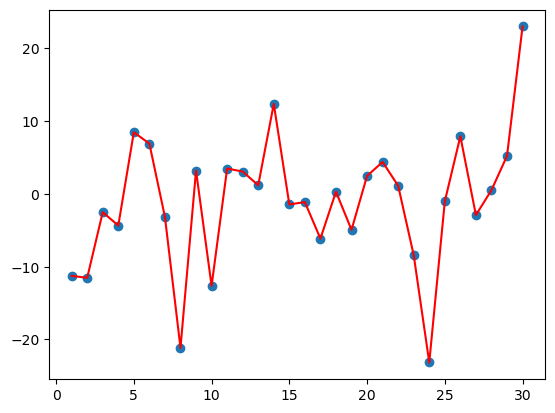

In [2]:
    # 固定随机数种子
    torch.manual_seed(0)
    # 产生30天的随机温度
    temperature = torch.randn(size=[ELEMENT_NUMBER, ]) * 10
    print(temperature)
    # 绘制平均温度
    days = torch.arange(1, ELEMENT_NUMBER + 1, 1)
    plt.plot(days, temperature, color='r')
    plt.scatter(days, temperature)
    plt.show()

# 2. 指数加权平均温度

In [3]:
# 2. 指数加权平均温度
def dm02(beta=0.9):
    # 固定随机数种子
    torch.manual_seed(0)
    # 产生30天的随机温度
    temperature = torch.randn(size=[ELEMENT_NUMBER, ]) * 10
    print(temperature)

    exp_weight_avg = []
    # idx从1开始
    for idx, temp in enumerate(temperature, 1):
        # 第一个元素的 EWA 值等于自身
        if idx == 1:
            exp_weight_avg.append(temp)
            continue
        # 第二个元素的 EWA 值等于上一个 EWA 乘以 β + 当前气温乘以 (1-β)
        # idx-2：2-2=0，exp_weight_avg列表中第一个值的下标值
        new_temp = exp_weight_avg[idx - 2] * beta + (1 - beta) * temp
        exp_weight_avg.append(new_temp)

    days = torch.arange(1, ELEMENT_NUMBER + 1, 1)
    plt.plot(days, exp_weight_avg, color='r')
    plt.scatter(days, temperature)
    plt.show()

tensor([-11.2584, -11.5236,  -2.5058,  -4.3388,   8.4871,   6.9201,  -3.1601,
        -21.1522,   3.2227, -12.6333,   3.4998,   3.0813,   1.1984,  12.3766,
         -1.4347,  -1.1161,  -6.1358,   0.3159,  -4.9268,   2.4841,   4.3970,
          1.1241,  -8.4106, -23.1604,  -1.0231,   7.9244,  -2.8967,   0.5251,
          5.2286,  23.0221])


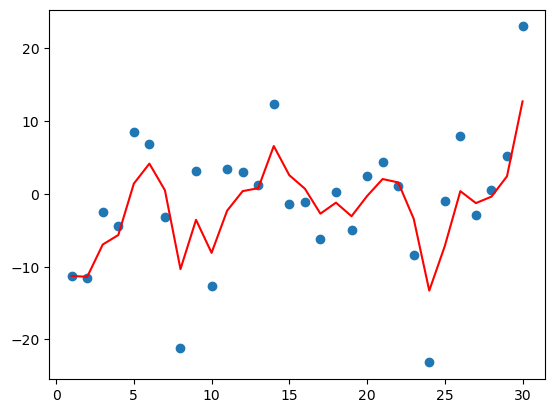

tensor([-11.2584, -11.5236,  -2.5058,  -4.3388,   8.4871,   6.9201,  -3.1601,
        -21.1522,   3.2227, -12.6333,   3.4998,   3.0813,   1.1984,  12.3766,
         -1.4347,  -1.1161,  -6.1358,   0.3159,  -4.9268,   2.4841,   4.3970,
          1.1241,  -8.4106, -23.1604,  -1.0231,   7.9244,  -2.8967,   0.5251,
          5.2286,  23.0221])


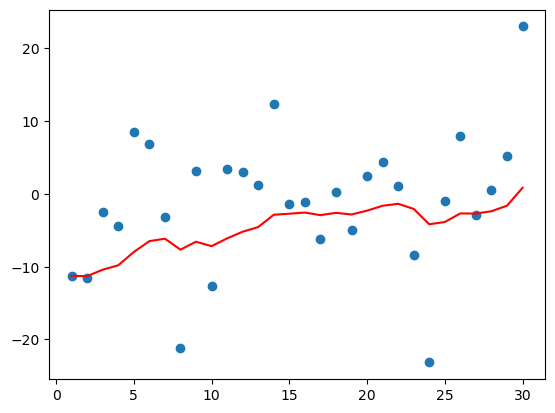

In [4]:
    dm02(0.5)   # 考虑 权重系数, 值越小, 数据越陡.
    dm02(0.9)   # 考虑 权重系数, 值越大, 数据越平缓.9